# ECSE: 415 - Computer Vision
## Assignment 4: PCA, Face Recognition
### Author: Antonios Valkanas (2606702034)

In [1]:
# Import useful libraries
import numpy as np
import cv2
import os
import glob
import functools
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import NearestNeighbors as NN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

### Question 1: Data Acquisition
You will need a group picture containing at least three people, with their faces clearly visible. This image will be used to evaluate the performance of your implementation. Display the image. Find additional pictures for each individual; the required number of pictures varies with a number of factors, but ten for every person should suffice. These images will be used to build our representation of faces, and should be cropped to be the same size containing only faces. The dimension and use of color is left as a design decision; consider smaller greyscale images if you run into computational issues, or for reducing the dimensionality of the data. Describe how you selected the images with respect to the conditions of the detection/classification methods.

For dimensionality reduction, I chose not to include colour as part of my data and used grayscale images. I chose small training data size for the images (200x200) because my computer cannot handle large images (because they cause long runtimes), this probably had an adverse effect on the effectiveness of my functions. Selecting the images was done with  in enviroments with similar lighting and poses to the test image to increase odds correct identification by reducing outside noise. Similarly, most pictures were taken on a similar background to the final image to attempt to reduce pattern interference with the background. Finally, all images were cropped using the automated script called preprocess.ipynb to ensure identical cropping sizes. 

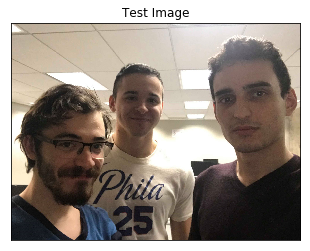

In [2]:
def pre_process(img_dir):
    data_path = os.path.join(img_dir,'*g')
    files = glob.glob(data_path)
    data = []
    for f1 in files:
        img = cv2.imread(f1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img[3:-3]
        img = cv2.resize(img, (200,200))
        data.append(img)
    return data

img_antonios = pre_process('Dataset/Antonios')
img_sam = pre_process('Dataset/Sam')
img_feras = pre_process('Dataset/Feras')

img = cv2.imread('Dataset/Test/4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xticks(()), plt.yticks(())
plt.title('Test Image')
plt.imshow(img)
plt.show()

### Question 2
Use PCA to find the eigenvector representation of your training data (5 points). Plot the variance explained by every vector in descending order (total variance explained vs. number of principal components) (2 points). Do you need all
the vectors to represent the data? Discuss (3 points). How well-clustered is your data? For every sample, nd the nearest neighbour (L2 distance), and check whether it is of the same class. What fraction of your data has a neighbour of the same class? Do this both in the original pixel space and the eigenspace, then compare the values; would you expect there to be a significant difference? 

* As it can be seen below not all vectors are required to define the data properly. In fact, there is a diminishing return for using extra vectors as the numbers of vectors used increases. I chose to use 15 vectors as that captures roughly 90% of the variance and it is much more computationally efficient than using all the vectors. It is true that using all the vectors can describe the data better but the added complexity is not worth it.

* The data without PCA is not very well clustered, however after transforming the trianing set to the eigenspace representation we see that the data is much better clustered. As it can be seen from the output below before PCA 86% of the image's closest neighbour belongs ot the same class. After PCA this jumps up to over 88%. Therefore, PCA has improved the clustering by a little, something that I did not expect. Assuming we take enough components to control for most of the variance of the dataset we expect the difference in clustering not to be very big since we would be losing only a little amount of information.

In [3]:
X = []
X.append(img_antonios)
X.append(img_feras)
X.append(img_sam)
X = functools.reduce(lambda x,y :x+y, X)
print(len(X))

Y = [['Antonios']*len(img_antonios)]
Y.append(['Feras']*len(img_feras))
Y.append(['Sam']*len(img_sam))
Y = functools.reduce(lambda x,y :x+y, Y)
print(Y)
print(len(Y))

X_train = np.array(X)
Y_train  = np.array(Y)

X_train = X_train.reshape(X_train.shape[0], -1)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)

# Get the variance explained by every principal component:
print(pca.explained_variance_ratio_)

44
['Antonios', 'Antonios', 'Antonios', 'Antonios', 'Antonios', 'Antonios', 'Antonios', 'Antonios', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Feras', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam', 'Sam']
44
[0.19934062 0.12880337 0.10473855 0.05866569 0.05559605 0.04331511
 0.03932226 0.03325671 0.0298354  0.02585526]


Text(0.5,1,'Cumulative Variance Explained')

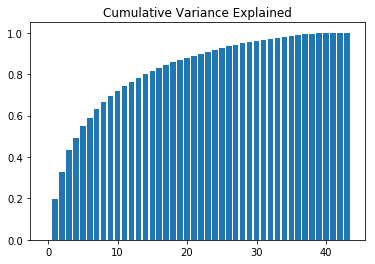

In [4]:
pca = PCA(n_components = 100)
x_train_pca = pca.fit_transform(X_train)
var = pca.explained_variance_ratio_
var = [sum(var[:i]) for i in range(len(var))]
plt.bar(list(range(0, len(var))), var)
plt.title('Cumulative Variance Explained')

Text(0.5,1,'Component Variance Explained by every Vector')

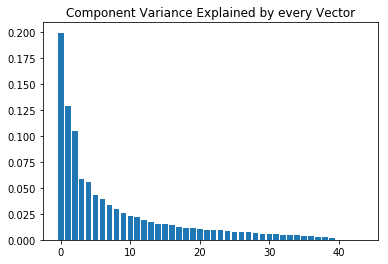

In [5]:
pca = PCA(n_components = 100)
x_train_pca = pca.fit_transform(X_train)
var = pca.explained_variance_ratio_
plt.bar(list(range(0, len(var))), var)
plt.title('Component Variance Explained by every Vector')

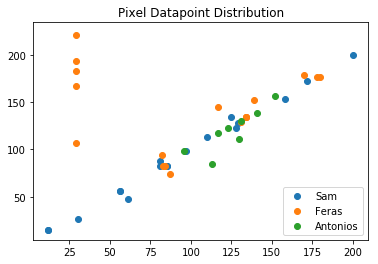

Fraction of pixel train data with neighbor of same class:  0.8636363636363636


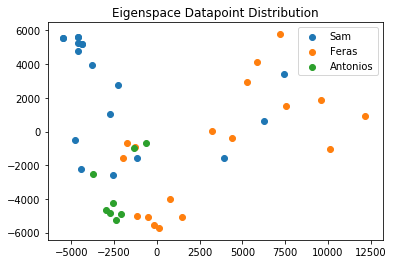

Fraction of PCA train data with neighbor of same class:  0.8863636363636364


In [6]:
pca = PCA(n_components = 15)
X_train = np.array(X)
X_train = X_train.reshape(X_train.shape[0], -1)
# Visualization code retrieved form stack overflow: https://stackoverflow.com/questions/44603609/python-how-to-plot-classification-data
for i in set(np.asarray(Y)): 
    x = X_train[Y_train == i, :]
    plt.scatter(x[:,0], x[:,1], label = i)
    
plt.legend()
plt.title('Pixel Datapoint Distribution')    
plt.show()

# clf = neighbors.KNeighborsClassifier(2)
# clf.fit(X_train, Y_train)
# k = clf.predict(X_train)
# print(classification_report(Y_train, k))

nn = NearestNeighbors(n_neighbors = 1, metric="l2")
nn.fit(X_train, Y_train)
val = []
for i, x in enumerate(X_train):
    dist, ind = nn.kneighbors(np.reshape(x, (1, -1)), n_neighbors=2)
    val.append(Y_train[i] == Y_train[ind[0][1]])
print("Fraction of pixel train data with neighbor of same class: ", sum(val)/len(val))

x_train_pca = pca.fit_transform(X_train)


# Visualization code retrieved form stack overflow: https://stackoverflow.com/questions/44603609/python-how-to-plot-classification-data
plt.figure()
for i in set(np.asarray(Y)): 
    x = X_train_pca[Y_train == i, :]
    plt.scatter(x[:,0], x[:,1], label = i)
    
    
plt.legend()
plt.title('Eigenspace Datapoint Distribution')    
plt.show()

nn = NearestNeighbors(n_neighbors = 1, metric="l2")
nn.fit(X_train_pca, Y_train)
val = []
for i, x in enumerate(X_train_pca):
    dist, ind = nn.kneighbors(np.reshape(x, (1, -1)), n_neighbors=2)
    val.append(Y_train[i] == Y_train[ind[0][1]])
print("Fraction of PCA train data with neighbor of same class: ", sum(val)/len(val))

In [7]:
clf = neighbors.KNeighborsClassifier(2)
clf.fit(X_train, Y_train)
k = clf.predict(X_train)
print(classification_report(Y_train, k))

             precision    recall  f1-score   support

   Antonios       0.89      1.00      0.94         8
      Feras       1.00      1.00      1.00        18
        Sam       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        44



In [8]:
nn = NN(n_neighbors = 1)
nn.fit(X_train_pca, Y_train)
dist, ind = nn.kneighbors(np.reshape(X_train_pca[0], (1, -1)), n_neighbors=2)
value = []
for i, x in enumerate(X_train_pca):
    distance, ind = nn.kneighbors(np.reshape(x, (1, -1)), n_neighbors=2)
    value.append(Y_train[i] == Y_train[ind[0][1]])

In [9]:
np.mean(np.array(value))

0.8863636363636364

In [10]:
nn = NN(n_neighbors = 1)
nn.fit(X_train, Y_train)
dist, ind = nn.kneighbors(np.reshape(X_train[0], (1, -1)), n_neighbors=2)
value = []
for i, x in enumerate(X_train):
    distance, ind = nn.kneighbors(np.reshape(x, (1, -1)), n_neighbors=2)
    value.append(Y_train[i] == Y_train[ind[0][1]])

In [11]:
np.mean(np.array(value))

0.8636363636363636

In [12]:
y_pred = clf.predict(X_train)
y_train = Y_train

### Question 3
You will now detect the faces in the group image. Use a sliding window to detect whether a section of the image contains a face. Set a threshold on the distance in eigenspace between the window contents and your training data.
You will now try to recognize each of the people in the group image. For the windows in which a face is detected, map the window to your eigenspace and find the nearest neighbour from your data. Identity of the test case will be based on the identity of the closest person in the training set. How well does the method work? How many false positive face detections do you get? For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identication would use 1). In which situations would expect the approach to fail, and what could you do to improve it?

* The method works well whenever the sliding window is able to correctly crop the entire face of the person to be identified. A problem with the image that I chose which makes this harder is that because all three of us are in different depth levels the ideal crop size for each head is different. (The guy in the center has a smaller crop size than the guys on the left and right). As a result the method is prone to more noise than necessary which increases the misidentification rate. 
* There are false positives that often occur. In most cases of the top 5 cropped images at least 2 are false positives which usually are clothes with wrinkles in them or the background that was also in the training image background.
* Increasing the number of neighbors didn't really help a lot of the time. Normally, we would expect that it would. In one instance increasing the number of neighbours helped fix misidentifications after NN was set to 3. The approach fails if the test image picture of someone is an outlier compared to their train images and is far away from them. If that were the case increasing the number of neighbours would have little effect as most of the neighbours would belong to another class. The way to solve this problem would be to increase the size of the training data (take mor epictures of the same person) such that the image would no longer be an outlier.

In [13]:
# Get eigenvectors
eigenfaces = pca.components_.reshape((15, 200, 200))
# Get eigenvalues
eigenvalues = pca.explained_variance_
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)

Projecting the input data on the eigenfaces orthonormal basis


14
14


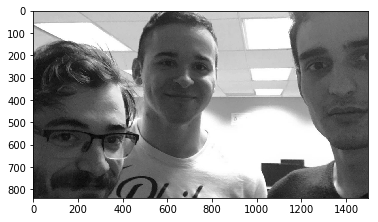

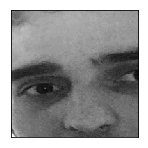

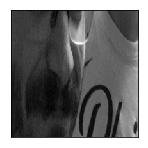

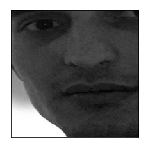

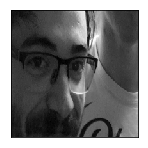

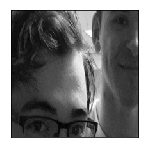

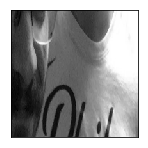

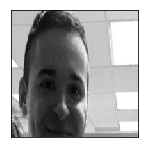

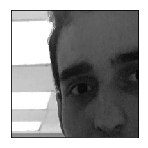

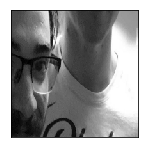

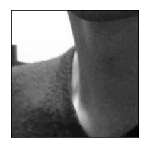

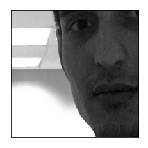

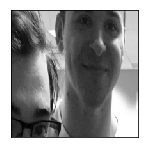

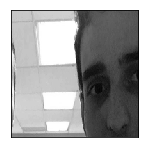

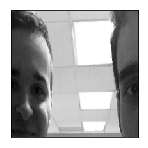

In [14]:
img = cv2.imread('Dataset/Test/4.jpg')
img = img[100:-100,50:-50]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img[200:-300,200:-250]
plt.imshow(img, cmap = 'gray')

window_size = 400
threshold_eigen_dist = 13000
mean_face = pca.mean_
def sliding_window(img, stride_x = 200, stride_y = 200, crop_size = window_size):
    windows = []
    for i in range(0, img.shape[0] - 200, stride_y):
        for j in range(0, img.shape[1] - 200, stride_x):
            windows.append(img[i:i+crop_size, j:j+crop_size + 300])
    return windows

def minimize_distance(windows):
    distances = []
    windows = np.asarray(windows)
    for window in windows:
        window = cv2.resize(window, (200,200))
        #win_flat = window.flatten()
        weights = pca.transform(window.flatten().reshape(1, -1))
        const = 0
        for n in range(0, eigenfaces.shape[0]):
            const = const + weights[0][n] * eigenfaces[n]
        res = mean_face.reshape(200, -1) + const
        dist = np.linalg.norm(window - res)
        distances.append((dist, window))
    return sorted(distances, key=lambda x:x[0])

windows = sliding_window(img, crop_size = window_size)
dists = minimize_distance(windows)


faces = []
for dist in dists:
        if dist[0] <= threshold_eigen_dist:
            faces.append(dist)

n_col = 1
n_row = 1
print(len(faces))
face_pics = []
            
for face in faces:
    face_pics.append(face[1])
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(face[1],cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
print(len(face_pics))

             precision    recall  f1-score   support

   Antonios       0.89      1.00      0.94         8
      Feras       1.00      1.00      1.00        18
        Sam       1.00      0.94      0.97        18

avg / total       0.98      0.98      0.98        44



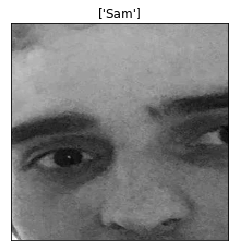

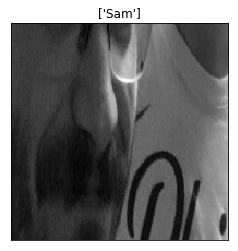

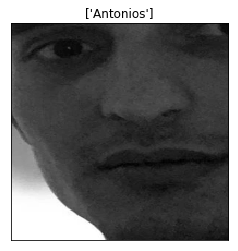

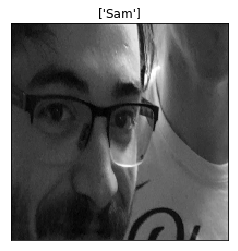

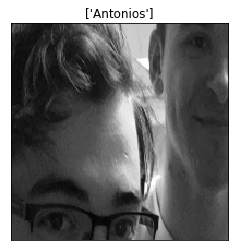

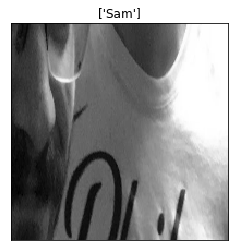

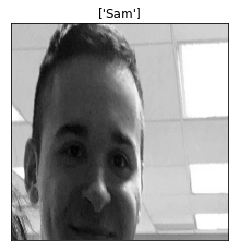

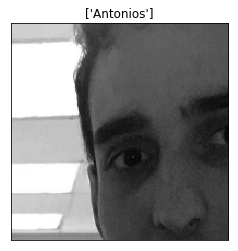

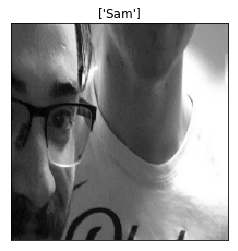

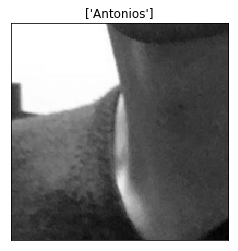

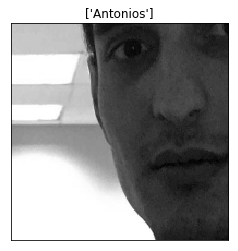

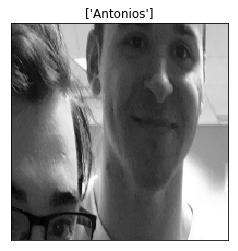

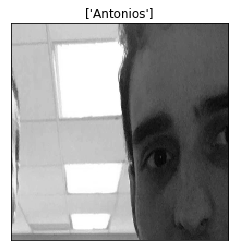

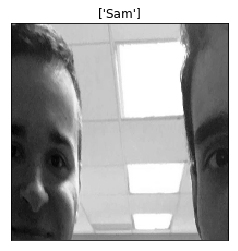

In [15]:
# Run face-id
clf = neighbors.KNeighborsClassifier(1)
clf.fit(pca.transform(X_train), Y_train)
print(classification_report(Y_train, k))

for i in range(len(face_pics)):
    # Transform input data to eigenspace
    dist, ind = nn.kneighbors(cv2.resize(face_pics[i],(200*200,1)), n_neighbors=1)
    plt.figure()
    plt.title('{}'.format(clf.predict(pca.transform(np.reshape(face_pics[i], (1,-1))))))
    plt.imshow(face_pics[i],cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

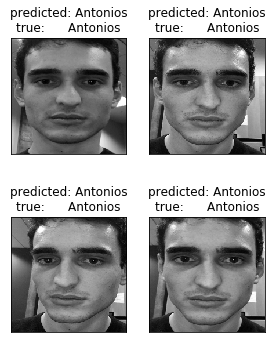

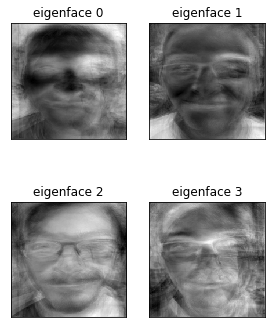

In [16]:
# Visualization code in this cell is taken from cv2 tutorial examples

# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=2, n_col=2):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((200,200)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, i):
    pred_name = y_pred[i]
    true_name = y_train[i]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_train, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X, prediction_titles, 200, 200)

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 200, 200)

plt.show()

### Question 4
Use an existing implementation of the Viola-Jones face detector, and compare the results with your detector (e.g. how many false positives do you obtain?). Under what conditions would you expect the Viola-Jones detector to work when
PCA does not?

* The Viola-Jones based detector outperforms my detector. The reason for this is that it was probably trained on a bigger dataset and uses more sophisticated frameworks for deciding whether a window has a face in it or not. While it sometimes also produces false positives those are much more rare compared to my code. 
* Viola-Jones will work if the picture is from the side, but PCA will probably face since we did not train it on side shots, only when we are frontally facing the camera will it work.

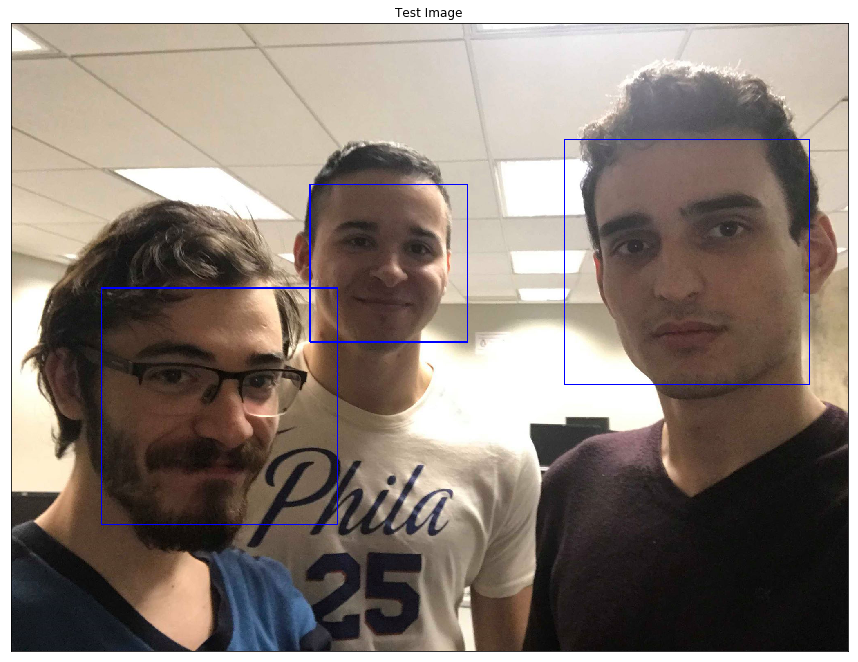

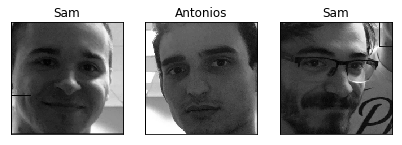

In [17]:
# Code below has been adapted from tutorial 8 Viola-Jones example.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('Dataset/Test/4.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(img_gray, 1.1,2)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)



# display images
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Test Image"), plt.xticks([]), plt.yticks([])
plt.show()

face_list = []
for (x,y,w,h) in faces:
    roi_color = img[y:y+h, x:x+w]
    face_list.append(cv2.cvtColor(roi_color, cv2.COLOR_BGR2GRAY))
    
for i in range(len(face_list)):
    face_list[i] = cv2.resize(face_list[i], (200,200))
face_list = np.asarray(face_list)
face_list = np.reshape(face_list, (len(face_list), 40000))
predictions = clf.predict(pca.transform(face_list))
plot_gallery(face_list, predictions, 200, 200, 1,3)

C:\Users\Antonios\Anaconda3\envs\my_root\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


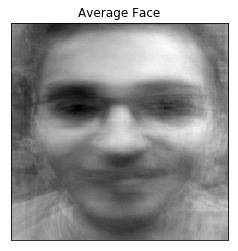

In [18]:
mean_face = np.zeros((1,200*200))

for i in X_train:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(Y_train))).flatten()

plt.imshow(mean_face.reshape(200, 200), cmap='gray')
plt.title('Average Face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()